# PCA Analysis

In [28]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
data = TrinaryData()
data.df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
T1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
pd.DataFrame(data.ser_y)

,name
timepoint,
T1,0
T2,1
T3,1
T4,1
T5,1
T6,1
T7,1
T8,2
T9,2


In [63]:
def doPCA(df_X, ser_y, title=""):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df_X)
    principal_df = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    principal_df.index = df_X.index
    final_df = pd.concat([principal_df, pd.DataFrame(ser_y)], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = ser_y.unique()
    colors = ['red', 'green', 'black', 'yellow', 'brown', 'pink']
    for target, color in zip(targets,colors):
        indicesToKeep = final_df['name'] == target
        ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
                   , final_df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

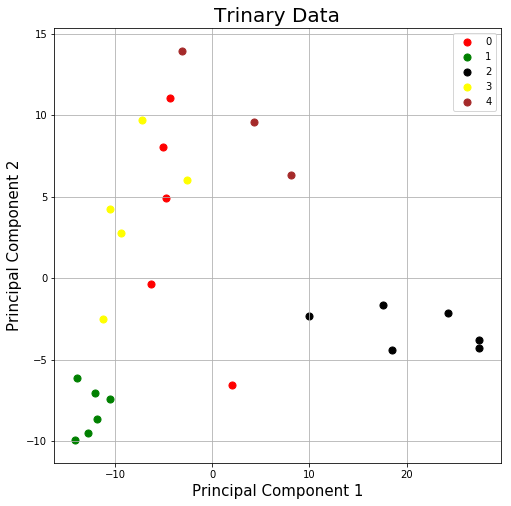

In [59]:
doPCA(data.df_X, data.ser_y, title="Trinary Data")

**observations**
1. States 0, 3, 4 overlap.

In [32]:
provider = DataProvider()
provider.do()
df_X = provider.df_normalized.head()

In [50]:
ser_y = provider.df_stage_matrix['name']
df_X = provider.df_normalized.T

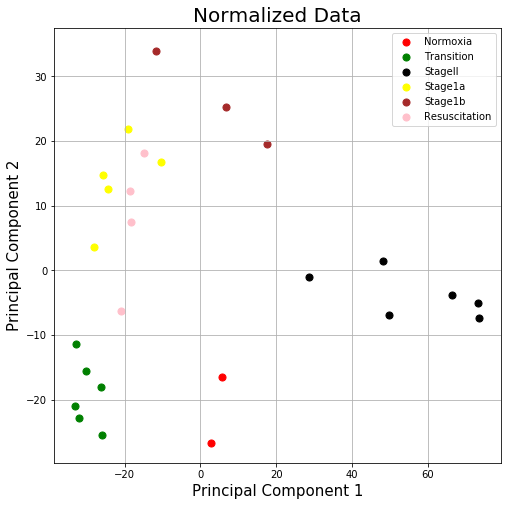

In [64]:
doPCA(df_X, ser_y, title="Normalized Data")

In [53]:
ser_y.head()

timepoint
T0      Normoxia
T1      Normoxia
T2    Transition
T3    Transition
T4    Transition
Name: name, dtype: object